# Diabetes prediction with Naive Bayes 

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.

Fields description follow:

preg = Number of times pregnant  
plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
pres = Diastolic blood pressure (mm Hg)  
skin = Triceps skin fold thickness (mm)  
test = 2-Hour serum insulin (mu U/ml)  
mass = Body mass index (weight in kg/(height in m)^2)  
pedi = Diabetes pedigree function  
age = Age (years)  
class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)  

We want to use Naive Bayes to predict the outcome.

0. Import the usual libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
diabetes = pd.read_csv('pima-indians-diabetes.csv', sep=",", header=None)
sns.set(rc={'figure.figsize':(8,5)})

1. Import it into a DataFrame 

In [2]:
diabetes.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.columns = columns

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Faites une description du dataset

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. It looks like we have some outliers. We want to remove the values of the insulin which are more than 3 standard deviations from the mean.

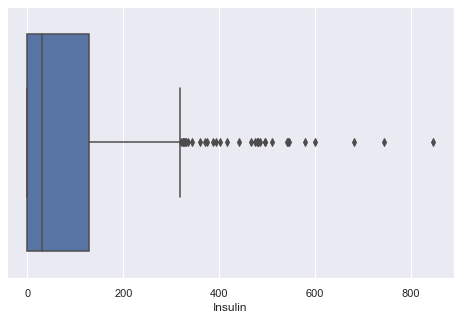

In [8]:
sns.boxplot(diabetes.Insulin)

In [9]:
diabetes.Insulin.mean()

79.79947916666667

In [10]:
stdInsulin3 = diabetes.Insulin.mean() + diabetes.Insulin.std()*3

In [11]:
mask = diabetes.Insulin > stdInsulin3

In [12]:
diabetes_filtered = diabetes[-mask]

4. Create a boxplot to see the repartition of the insulin in the dataset

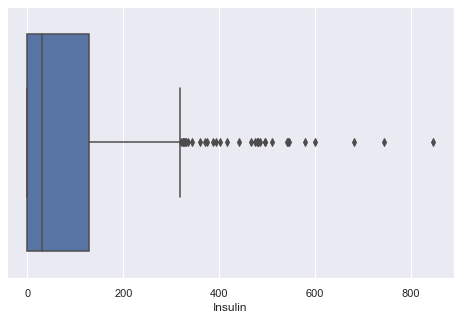

In [13]:
sns.boxplot(diabetes.Insulin)

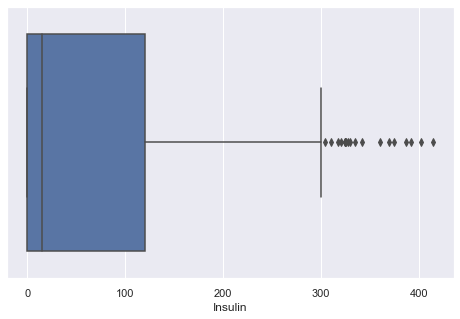

In [14]:
sns.boxplot(diabetes_filtered.Insulin)

In [15]:
def plotBoxplot(df):
    fig, axes = plt.subplots(2, 4, figsize=(18, 10))
    sns.despine(left=True)

    sns.boxplot(df.Pregnancies, ax=axes[0, 0])
    sns.boxplot(df.Glucose, ax=axes[0, 1])
    sns.boxplot(df.BloodPressure, ax=axes[0, 2])
    sns.boxplot(df.SkinThickness, ax=axes[0, 3])
    sns.boxplot(df.Insulin, ax=axes[1, 0])
    sns.boxplot(df.BMI, ax=axes[1, 1])
    sns.boxplot(df.Age, ax=axes[1, 2])

    fig.delaxes(axes[1][3])   # it removes the last empty plot

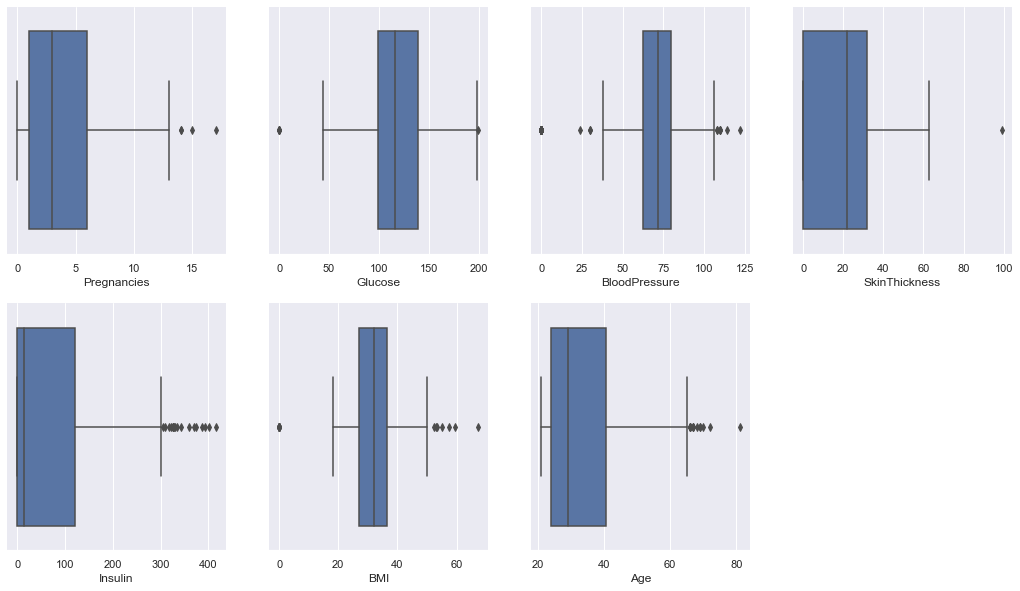

In [16]:
plotBoxplot(diabetes_filtered)

In [17]:
diabetes_filtered.Insulin.mean()

68.54266666666666

5. Check the distribution of each column

In [18]:
def plotDistributions(df):
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    sns.despine(left=True)

    sns.distplot(df.Pregnancies, ax=axes[0, 0])
    sns.distplot(df.Glucose, ax=axes[0, 1])
    sns.distplot(df.BloodPressure, ax=axes[0, 2])
    sns.distplot(df.SkinThickness, ax=axes[0, 3])
    sns.distplot(df.Insulin, ax=axes[1, 0])
    sns.distplot(df.BMI, ax=axes[1, 1])
    sns.distplot(df.Age, ax=axes[1, 2])

    fig.delaxes(axes[1][3])  # remove the last empty plot

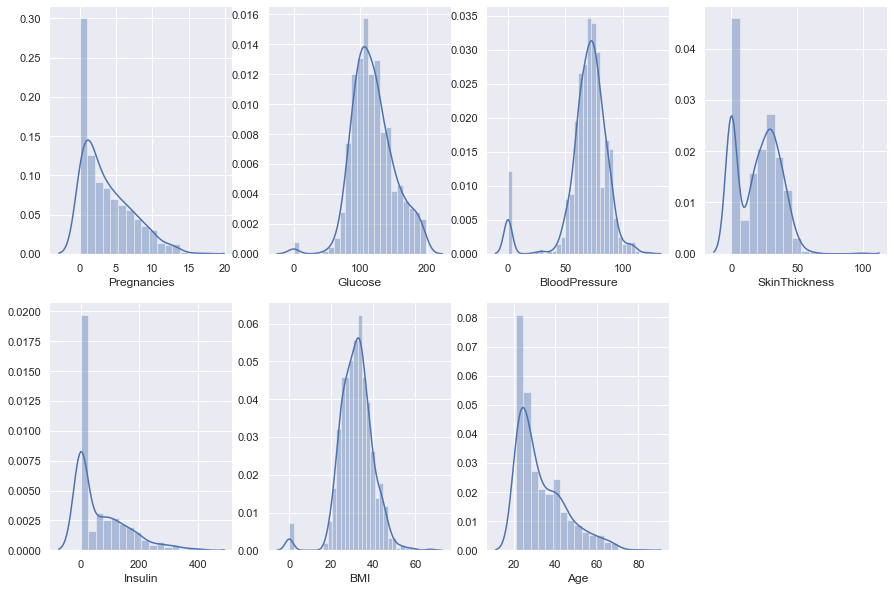

In [19]:
plotDistributions(diabetes_filtered)

6. It seems like we still have some outliers. We use the same technique as before to remove them.

In [20]:
diabetes_filtered.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [21]:
maskPregnancies = diabetes_filtered.Pregnancies < 15
maskSkinThickness =  (diabetes_filtered.SkinThickness > 0) & (diabetes_filtered.SkinThickness < 90)
maskInsulin = diabetes_filtered.Insulin > 0
maskAge = (0 < diabetes_filtered.Age) & (diabetes_filtered.Age < 80)
maskBloodPressure = diabetes_filtered.BloodPressure > 0
maskBMI = (0 < diabetes_filtered.BMI) & (diabetes_filtered.BMI < 60)

mask2 = maskPregnancies & maskSkinThickness & maskInsulin & maskAge & maskBloodPressure & maskBMI
diabetes_filtered2 = diabetes_filtered[mask2]

In [22]:
diabetes_filtered2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1


In [23]:
diabetes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               750 non-null    int64  
 1   Glucose                   750 non-null    int64  
 2   BloodPressure             750 non-null    int64  
 3   SkinThickness             750 non-null    int64  
 4   Insulin                   750 non-null    int64  
 5   BMI                       750 non-null    float64
 6   DiabetesPedigreeFunction  750 non-null    float64
 7   Age                       750 non-null    int64  
 8   Outcome                   750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.6 KB


In [24]:
diabetes_filtered2.mean()

Pregnancies                   3.229111
Glucose                     120.008086
BloodPressure                70.420485
SkinThickness                28.708895
Insulin                     137.207547
BMI                          32.779515
DiabetesPedigreeFunction      0.516690
Age                          30.460916
Outcome                       0.309973
dtype: float64

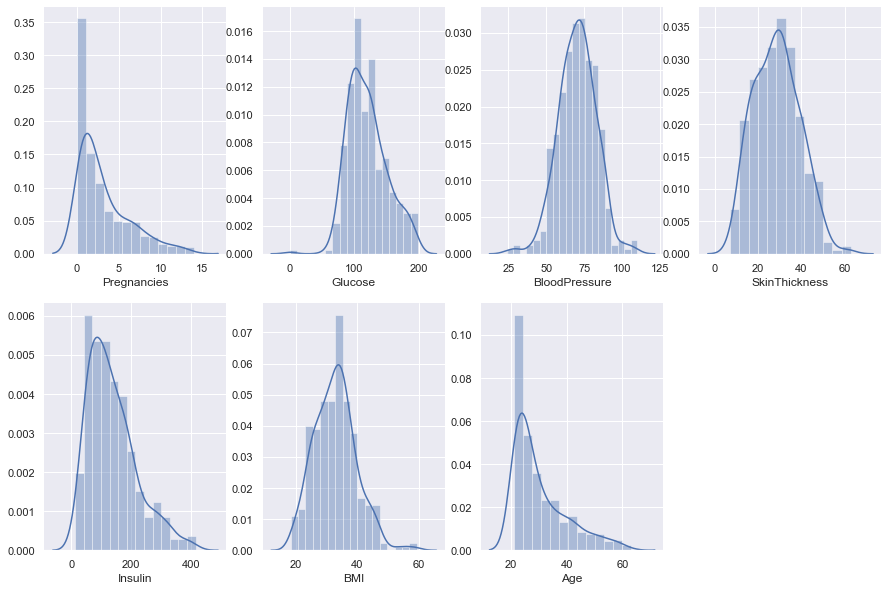

In [25]:
plotDistributions(diabetes_filtered2)

In [26]:
diabetes_filtered.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

7. Remplace NaN values by an interpolation

In [27]:
diabetes_filtered.interpolate()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
diabetes_filtered.iloc[:, :-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


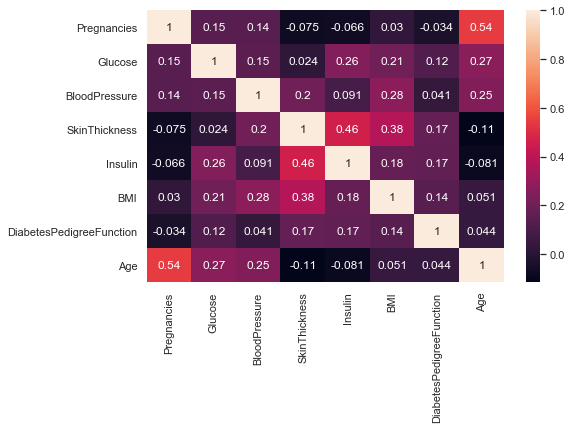

In [29]:
sns.heatmap(diabetes_filtered.iloc[:, :-1].corr(), annot = True)

8. Normalise all the predictor variables and save them in the variable X.

In [30]:
X = diabetes_filtered.iloc[:, :-1]
y = diabetes_filtered.iloc[:, -1]

There are different methods in order to normalize the variables. See [here](https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475).

We can use the ```StandardScaler``` function:

In [31]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X_std_scaler = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

X_std_scaler.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.632770,0.897257,0.153908,0.932352,-0.770570,0.219023,0.498577,1.433964
1,-0.847509,-1.108391,-0.154045,0.555051,-0.770570,-0.668908,-0.363329,-0.188683
2,1.224881,2.011505,-0.256696,-1.268569,-0.770570,-1.087504,0.639105,-0.103280
3,-0.847509,-0.981048,-0.154045,0.177751,0.286196,-0.478637,-0.937932,-1.042707
4,-1.143565,0.547064,-1.488508,0.932352,1.118119,1.424072,5.685625,-0.017878


In alternative, we can use the *z-score method* (often called standardization), which transforms the data into a distribution with a mean of 0 and a standard deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature and then dividing by the standard deviation:

$$ x_{std} = \frac{x - \mu}{\sigma} $$

It is important to bear in mind that z-scores are not necessarily normally distributed. They just scale the data and follow the same distribution as the original input. This transformed distribution has a mean of 0 and a standard deviation of 1 and is going to be the standard normal distribution (see the image above) only if the input feature follows a normal distribution.

In [32]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
X_z_score = z_score(X)

X_z_score.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.632348,0.896658,0.153805,0.931730,-0.770056,0.218877,0.498245,1.433008
1,-0.846944,-1.107652,-0.153942,0.554681,-0.770056,-0.668462,-0.363086,-0.188557
2,1.224065,2.010164,-0.256525,-1.267723,-0.770056,-1.086778,0.638679,-0.103211
3,-0.846944,-0.980394,-0.153942,0.177632,0.286005,-0.478318,-0.937307,-1.042012
4,-1.142802,0.546699,-1.487515,0.931730,1.117373,1.423122,5.681833,-0.017866


9. Plot the distribution of each variable

In [33]:
X_z_score.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

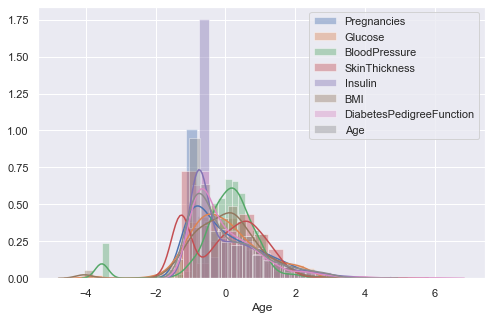

In [34]:
for column in X_std_scaler.columns.values:
    sns.distplot(X_std_scaler[column])
    
plt.legend(labels=X_std_scaler.columns.values)

10. Split the dataset in train and test set 

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std_scaler, y, random_state=0, test_size=0.20)

11. Import Gaussian Naive Bayes & train it on the ```X_train```

In [36]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
y_pred = classifier.predict(X_test)

12. Regardez votre performance 

In [38]:
from sklearn import metrics
print("Accuracy with GaussianNB: "+ str(metrics.accuracy_score(y_test, y_pred)*100) +"%")

Accuracy with GaussianNB: 76.0%


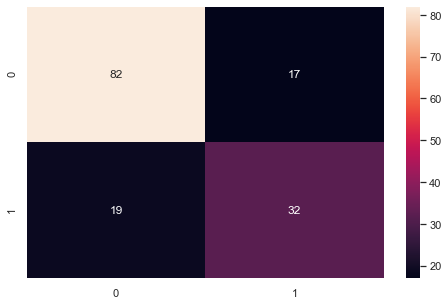

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = True, yticklabels = True)

In [40]:
from sklearn.naive_bayes import BernoulliNB

classifier_bernoulli = BernoulliNB()
classifier_bernoulli.fit(X_train, y_train)
print("Accuracy with GaussianNB: "+str(classifier_bernoulli.score(X_test, y_test)*100)+"%")

Accuracy with GaussianNB: 68.0%


## Bootstrap aggregating

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. (From [Wikipedia](https://en.wikipedia.org/wiki/Bootstrap_aggregating))

Bagging is an ensemble technique mainly used to reduce the variance of our predictions by combining the result of multiple classifiers modelled on different sub-samples of the same data set. (Check [here](https://medium.com/swlh/difference-between-bagging-and-boosting-f996253acd22) and [here](https://medium.com/swlh/boosting-and-bagging-explained-with-examples-5353a36eb78d))

Main Steps involved in bagging are:

1. Creating multiple datasets: Sampling is done with a replacement on the original data set and new datasets are formed from the original dataset.
2. Building multiple classifiers: On each of these smaller datasets, a classifier is built, usually, the same classifier is built on all the datasets.
3. Combining Classifiers: The predictions of all the individual classifiers are now combined to give a better classifier, usually with very less variance compared to before.

For more on *ensemble methods*: [here](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)

Bagging is similar to Divide and conquer. It is a group of predictive models run on multiple subsets from the original dataset combined together to achieve better accuracy and model stability.

14. Create a Bagging model using Naive Bayes. Usinge the module ```BaggingClassifier```, create a new model.

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion="entropy")

base_methods_dict = {"Logistic Regression": lr,
                     "BernoulliNB": bnb,
                     "GaussianNB": gnb,
                     "Decision Tree": dtc
                    } 

for bm_name, bm in base_methods_dict.items():
    print("Method: ", bm_name)
    bag_model = BaggingClassifier(base_estimator = bm, n_estimators = 100, bootstrap = True)
    bag_model=bag_model.fit(X_train,y_train)
    y_pred_bm = bag_model.predict(X_test)
    print("Accuracy Bagging: "+str(bag_model.score(X_test, y_test)*100)+"%")
    print(confusion_matrix(y_test, y_pred_bm))
    print("-------------")
    #print("Accuracy Bagging with "+bm_name+": "+ str(metrics.accuracy_score(y_test, y_pred_bm)*100) +"% \n")

Method:  Logistic Regression
Accuracy Bagging: 77.33333333333333%
[[83 16]
 [18 33]]
-------------
Method:  BernoulliNB
Accuracy Bagging: 68.0%
[[73 26]
 [22 29]]
-------------
Method:  GaussianNB
Accuracy Bagging: 76.0%
[[82 17]
 [19 32]]
-------------
Method:  Decision Tree
Accuracy Bagging: 74.66666666666667%
[[80 19]
 [19 32]]
-------------
